In [ ]:
# 数据集：RecGFI的数据集

In [1]:
import json

with open('../data/issuedata.json') as f:
    issuestr = json.load(f)
    issuedic = json.loads(issuestr)
    issuedata = issuedic['issuedata']

In [3]:
# read files
import pandas as pd
df = pd.read_csv("..\data\issue_id_info.csv")
df1 = pd.read_csv("..\data\\repo_id_info.csv")

In [4]:
# extract items from pandas
ddf = df.loc[df['repo_name'] == 'pandas']
print(ddf.shape[0])
print(ddf)

4238
       Unnamed: 0   issue_id  repo_owner repo_name  repo_number  \
26681       26681   60338949  pandas-dev    pandas         6051   
26683       26683   47663339  pandas-dev    pandas         7640   
26684       26684   40745615  pandas-dev    pandas         8860   
26703       26703   40766610  pandas-dev    pandas        10381   
26706       26706   42857236  pandas-dev    pandas        12541   
...           ...        ...         ...       ...          ...   
53462       53462   56247860  pandas-dev    pandas        17496   
53481       53481  170853265  pandas-dev    pandas        37280   
53482       53482   55295695  pandas-dev    pandas        17336   
53491       53491   68498503  pandas-dev    pandas        20031   
53497       53497   63375095  pandas-dev    pandas        18943   

       resolver_commit_num  
26681                    0  
26683                   13  
26684                   85  
26703                   95  
26706                  183  
...             

In [4]:
# generate urls of the issues and save to files
import csv
httpstr = 'https://github.com/pandas-dev/pandas/issues/'

lst = []
for index, row in ddf.iterrows():
    lst.append([httpstr + str(row['repo_number'])])
#         print(row['repo_number'])
# print(lst)

with open('..\data\pandas_link.csv', 'w', encoding='utf8', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for item in lst:
        writer.writerow(item)

In [5]:
# 从原data中提取符合条件的issue（这里为pandas的所有issue）
# 放入data列表中
data=[]
pd_issue_ids = pd.to_numeric((ddf['issue_id'])).tolist()
for i in range(len(issuedata)):
    if issuedata[i][1]['issue_id'] in pd_issue_ids:
        data.append(issuedata[i][1])
print(len(data))
print(issuedata[i][0])
# print(issuedata[i][0]['issue_id'])

4238
{'issue_id': 65398189, 'proid': 35819264, 'owner_id': 12882, 'issuet': '2018-01-25 18:30:39', 'clst': '2020-02-27 23:17:44', 'rpt_id': 5078102, 'cls_id': 39337578, 'language': 'C#', 'pro_star': 1914, 'isslist': [959, None, None, None, None, None, None, None, 941, None, None, 959, 960, None, 966, None, None, None, None, None, None, None, None, None, None, None, 1442, None, None, None, None, None, None, None, None, 875, 875, None, None, None, None, None, 980, None, None, None, 981, None, None, 983, 984, None, 1448, None, None, None, None, 986, None, None, None, 990, None, None, None, None, 991, None, None, None, None, None, None, None, None, None, 992, None, 1463], 'proclspr': 1218, 'rptcmt': 0, 'rptallcmt': 23, 'rptpronum': 4, 'rptstar': 0, 'rptfoll': 2, 'rptalliss': 56, 'rptiss': 3, 'rptallpr': 4, 'rptpr': 0, 'rptissues': [64885669, 65320093, 69679049], 'ownercmt': 0, 'ownerallcmt': 0, 'ownerpronum': 180, 'ownerstar': 18750, 'ownerfoll': 9, 'owneralliss': 0, 'owneriss': 0, 'ownera

In [6]:
from getFirstIssue import get_first_issue
LTC_1st_issues, OTC_1st_issues = get_first_issue(data)

issue cnt in total: 4238
num of resolver: 1097
issue cnt by LTC: 3576
issue cnt by OTC: 662
first issue cnt by LTC: 435
first issue cnt by OTC: 662


In [7]:
LTC_issue_num = len(LTC_1st_issues)
OTC_issue_num = len(OTC_1st_issues)

# 转换为dataframe
LTC_df = pd.DataFrame(LTC_1st_issues)
OTC_df = pd.DataFrame(OTC_1st_issues)
# print(LTC_df)

In [8]:
def replace_with_l(lst):
    for i in range(len(lst)):
        lst[i] = len(lst[i])
    return lst
    

# print(LTC_df['usedt'].tolist())
usedt1 = LTC_df['usedt'].tolist()
usedt2 = OTC_df['usedt'].tolist()

title1 = LTC_df['title'].tolist()
title1 = replace_with_l(title1)
# print(title1)
title2 = OTC_df['title'].tolist()
title2 = replace_with_l(title2)

body1 = LTC_df['body'].tolist()
body1 = replace_with_l(body1)
body2 = OTC_df['body'].tolist()
body2 = replace_with_l(body2)

label_num1 = LTC_df['labels'].tolist()
label_num2 = OTC_df['labels'].tolist()

fromcmt1 = LTC_df['fromcmt'].tolist()
fromcmt2 = OTC_df['fromcmt'].tolist()

clscmt1 = LTC_df['clscmt'].tolist()
clscmt2 = OTC_df['clscmt'].tolist()

comment1 = LTC_df['commentbody'].tolist()
comment1 = replace_with_l(comment1)
comment2 = OTC_df['commentbody'].tolist()
comment2 = replace_with_l(comment2)

In [9]:
import numpy as np
tmp1 = np.array(label_num1)
# print(tmp1.sum(axis=1).tolist())
import numpy as np
tmp2 = np.array(label_num2)
# print(tmp2.sum(axis=1).tolist())

In [10]:
# mann-whitney U 检验
import scipy.stats as stats
print(stats.mannwhitneyu(usedt1,usedt2,alternative='two-sided'))
print(stats.mannwhitneyu(title1,title2,alternative='two-sided'))
print(stats.mannwhitneyu(body1,body2,alternative='two-sided'))
print(stats.mannwhitneyu(tmp1.sum(axis=1).tolist(),tmp2.sum(axis=1).tolist(),alternative='two-sided'))
print(stats.mannwhitneyu(fromcmt1,fromcmt2,alternative='two-sided'))
print(stats.mannwhitneyu(clscmt1,clscmt2,alternative='two-sided'))
print(stats.mannwhitneyu(comment1,comment2,alternative='two-sided'))

MannwhitneyuResult(statistic=145564.0, pvalue=0.7584545450683637)
MannwhitneyuResult(statistic=148488.5, pvalue=0.3802869680595319)
MannwhitneyuResult(statistic=148956.0, pvalue=0.3328876025131642)
MannwhitneyuResult(statistic=144465.5, pvalue=0.9248120528827355)
MannwhitneyuResult(statistic=143881.0, pvalue=0.8236042913161765)
MannwhitneyuResult(statistic=167399.5, pvalue=2.814343141132411e-07)
MannwhitneyuResult(statistic=140099.5, pvalue=0.4460561189321791)


[('none', 4.49), ('pandas', 3.19), ('the', 2.27), ('in', 1.86), ('python', 1.16), ('to', 1.16), ('pd', 1.09), ('py', 0.93), ('of', 0.9), ('rst', 0.89), ('source', 0.89), ('doc', 0.88), ('is', 0.87), ('df', 0.8), ('not', 0.78), ('line', 0.76), ('whitespace', 0.63), ('cookbook', 0.63), ('core', 0.62), ('this', 0.6), ('after', 0.6), ('index', 0.57), ('with', 0.57), ('missing', 0.56), ('and', 0.54), ('dataframe', 0.52), ('as', 0.5), ('file', 0.5), ('self', 0.49), ('lib', 0.47), ('versions', 0.47), ('if', 0.46), ('output', 0.46), ('for', 0.44), ('series', 0.44), ('be', 0.41), ('details', 0.41), ('os', 0.41), ('it', 0.37), ('dtype', 0.36), ('import', 0.34), ('that', 0.34), ('numpy', 0.34), ('https', 0.32), ('dev', 0.32), ('or', 0.31), ('all', 0.31), ('code', 0.31), ('on', 0.3), ('html', 0.3), ('data', 0.29), ('does', 0.29), ('start', 0.29), ('values', 0.28), ('com', 0.28), ('should', 0.28), ('expected', 0.27), ('read', 0.26), ('show', 0.26), ('utf', 0.26), ('ipython', 0.26), ('packages', 0.2

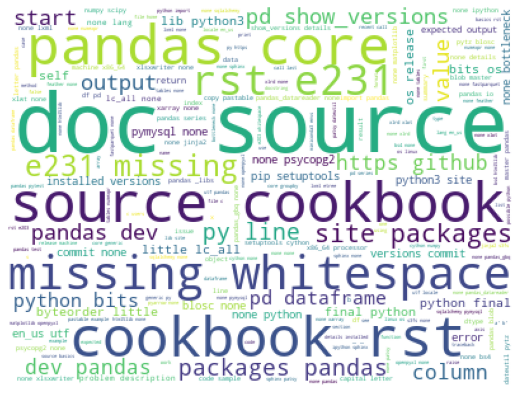

------------------
[('none', 4.91), ('pandas', 2.78), ('the', 2.46), ('in', 1.77), ('to', 1.37), ('python', 1.3), ('pd', 1.23), ('of', 0.97), ('is', 0.93), ('df', 0.86), ('py', 0.78), ('this', 0.69), ('index', 0.68), ('as', 0.62), ('and', 0.6), ('line', 0.58), ('output', 0.56), ('if', 0.53), ('dataframe', 0.53), ('versions', 0.53), ('lib', 0.53), ('self', 0.53), ('for', 0.52), ('not', 0.51), ('be', 0.46), ('os', 0.45), ('it', 0.44), ('nan', 0.44), ('series', 0.44), ('details', 0.44), ('file', 0.42), ('that', 0.41), ('with', 0.41), ('core', 0.4), ('html', 0.39), ('data', 0.39), ('dtype', 0.37), ('code', 0.36), ('are', 0.36), ('import', 0.36), ('all', 0.35), ('see', 0.34), ('numpy', 0.34), ('also', 0.34), ('np', 0.32), ('problem', 0.32), ('https', 0.32), ('or', 0.31), ('on', 0.3), ('expected', 0.3), ('utf', 0.3), ('packages', 0.3), ('show', 0.29), ('ipython', 0.28), ('matplotlib', 0.28), ('parameters', 0.28), ('from', 0.27), ('return', 0.27), ('example', 0.27), ('name', 0.27), ('en', 0.2

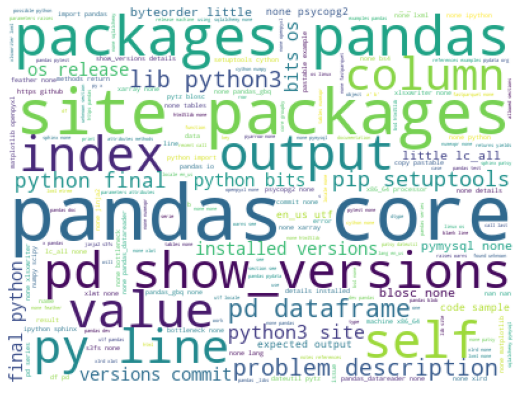

In [20]:
# 词频统计，但是这里的content没有去掉url等等信息，不是pure content
from getWordFreq import get_word_freq

body_content1 = LTC_df['body'].tolist()
s = ""
for item in body_content1:
    s += str(item)
get_word_freq(s)

print("------------------")

body_content2 = OTC_df['body'].tolist()
s = ""
for item in body_content2:
    s += str(item) 
get_word_freq(s)
